# NYC Taxi Data Science Challenge
By Shyam Balagurumurthy Viswanathan

## Introduction

For the challenge, we will use data collected by the New York City Taxi and Limousine commission about "Green" Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. We will use the data from September 2015. We are using NYC Taxi and Limousine trip record data: (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml).

We will also address various different questions as part of the analysis and build different models to predict the 'Tip_percentage' provided on each trip.

In [1]:
#Import necessary libraries for data import, analysis and models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopy.distance as geo
import datetime
from datetime import timedelta
import seaborn as sns
from math import cos, asin, sqrt
import pickle
import folium
import geohash
import os

## Loading the dataset Programmatically

Dataset can be loaded in different ways automatically. Here we are going get the year/month and load the dataset programmicaly. We can use other methods like robotic way to get the data. As this does not have any autentication, we will use simple method. 

In [2]:
#Get year,month 
year = str(input("Enter the year(4 digits): ")).zfill(4)
month = str(input("Enter the month number: ")).zfill(2)

Enter the year(4 digits): 2015
Enter the month number: 9


In [3]:
url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_'+year+'-'+month+'.csv'

try:
    df = pd.read_csv(url,sep=',')
except:
    print("Error in inputs. Downloading default dataset of year 2015 and September month.")
    df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv',sep=',')

print("Dataset loaded successfully.")

Dataset loaded successfully.


Before proceeding further lets glance through the dataset and perform basic summary statistics on the dataset.

In [4]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

In [6]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


In [7]:
print("Total Observations: {}".format(df.count()[0]))
print("Number of Features: {}".format(len(df.columns)))
print('Column names: {}'.format(df.columns))

Total Observations: 1494926
Number of Features: 21
Column names: Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')


### Summary for Question 1:

Below are the list of important points which are noted from above summary statistics.

1. Total observations are highlighted in printed above.
2. 'Ehail_fee' has no values. It is just `NaN`.
3. For some records `Pickup_longitude, Pickup_latitude, Dropoff_longitude, Dropoff_latitude` is '0'. But seeing the minimum value.
4. For some records `Passenger_count` is '0'
5. `Trip_distance` is given as '0' for some records.
6. `Fare_amount, Extra, MTA_tax, Tip_amount, Tolls_amount, improvement_surcharge, Total_amount ` is provided in negative number for some records.
7. `Trip_type` has space in the column name.


## Analysis on Trip Distance

Lets deep dive into on `Trip_distance` feature and plot some charts for it. Also derive any hypotesis on it. From previous stats we found that `Trip_distance` is having `0` values.

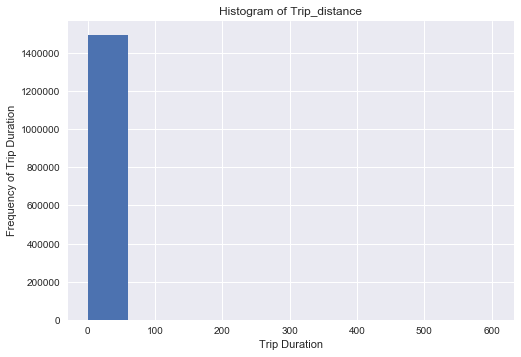

In [8]:
df.Trip_distance.plot(kind='hist')
plt.title("Histogram of Trip_distance")
plt.xlabel('Trip Duration')
plt.ylabel('Frequency of Trip Duration')

It seems to be heavily skewed and most it seems most of the trip distance is between `0` and `50` miles. We will plot `Trip_distance` with other features to understand it better.

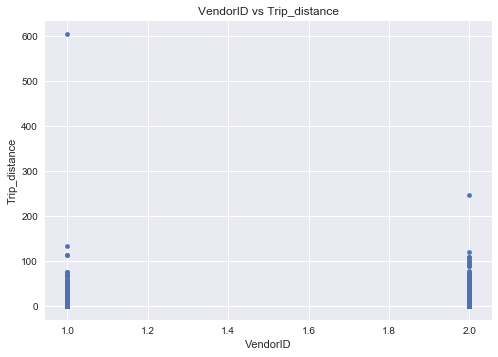

In [9]:
# Find Trip_distance per vendorID.
df.plot(x='VendorID',y='Trip_distance',kind='scatter')
plt.title("VendorID vs Trip_distance")

### Outliers Analysis

It seems that trip there are couple of outliers for each vendors. Lets deepdive into those outliers and see if there are any anomalies and find great circle distance to see if those are valid.

In [10]:
def calculate_distance(x):
    """Return great circle distance of pickup and dropoff point"""
    return(geo.great_circle((x.Pickup_latitude,x.Pickup_longitude),(x.Dropoff_latitude,x.Dropoff_longitude)).miles)

In [11]:
# Select the recods which has more travel time than 100 SD

mean = np.mean(df['Trip_distance'])
sd = np.std(df['Trip_distance'])
df[df['Trip_distance'] >= mean + 100*sd]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1321961,1,2015-09-27 03:13:48,2015-09-27 03:24:12,N,1,-73.937164,40.804386,-73.901382,40.819443,1,...,1.25,0.5,0.5,0.0,0.0,NaN,0.3,2.55,2,1.0


In [12]:
# Great circle distance for the outlier 

print("Great circle distance of outlier in Miles: {}".format( \
np.array(df[df['Trip_distance'] >= mean + 100*sd].apply(calculate_distance,axis=1))[0]))

Great circle distance of outlier in Miles: 2.14152307442842


Clearly second record is an outlier and wrong data. It has a fare amount of `2.55` and the travel distance around 600 miles. That is impossible and the great circle distance is `2.14 miles`. So the record seems to be wrongly entered into the system. For now we will reject the one outlier record.

In [13]:
# Drop the recods which has more travel time than 100 SD as it is an outlier
df.drop([df[df['Trip_distance'] >= mean + 100*sd].index.values[0]],inplace=True)

Now, lets validate the hypothesis.

1. Trip distance which are 0 and it has latitude and longitude
2. Trip distance which are 0 and it does not have either latitude and longitude in pickup and drop.

#### 1. Trip distance which are 0 and it has latitude and longitude

Observations are having a trip distance of 0 miles but has valid latitude and longitude in pickup/dropoff. So we can calculate great circle distance between two points. Which can be used as an approximate distance. A better way to do it is using the actual distance calculation using google maps API. As google API has hit limits, we will just use show the code to use it.

In [14]:
new_trip_distance = pd.Series(round(df[np.logical_and(df.Trip_distance == 0,~ np.logical_or(df.Pickup_longitude == 0,df.Dropoff_longitude == 0))]\
.apply(calculate_distance,axis=1),2),name='Trip_distance')

In [15]:
#Updating the new trip distance back to the original dataset
df.update(new_trip_distance)

In [16]:
# Trip distance has been updated
df.head(5).Trip_distance

0    0.01
1    0.00
2    0.59
3    0.74
4    0.61
Name: Trip_distance, dtype: float64

In [17]:
# Zero Trip distance after update
print("Zero Trip Distance after update: {}".format(df[df.Trip_distance ==0].count()[0]))

Zero Trip Distance after update: 13193


After updating the trip distance using Great circle distance, we can still see large number of records are having zero distance. 

#### 2. Trip distance which are 0 and it has latitude and longitude

There are many observations which are still having 0 distance but with valid latitude and longitude. These are due to a small delta between pickup and dropoff. 

Still the histogram is skewed, so we will take two standard deviations of the data and create a histogram chart and perform log transformation to get a good histogram.

In [18]:
mean = np.mean(df['Trip_distance'])
sd = np.std(df['Trip_distance'])
df_2sd = df[df['Trip_distance'] <= mean + 2*sd]
df_2sd = df_2sd[df_2sd['Trip_distance'] >= mean - 2*sd]

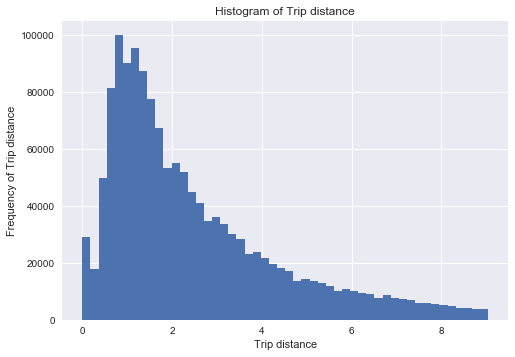

In [19]:
df_2sd.Trip_distance.plot(kind='hist',bins=50)
plt.title("Histogram of Trip distance")
plt.xlabel("Trip distance")
plt.ylabel("Frequency of Trip distance")

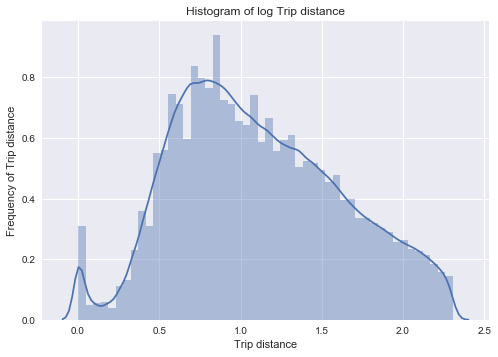

In [20]:

#np.log(df_2sd.Trip_distance+1).plot(kind='hist',bins=50)
sns.distplot(np.log(df_2sd.Trip_distance+1),bins=50)
plt.title("Histogram of log Trip distance")
plt.xlabel("Trip distance")
plt.ylabel("Frequency of Trip distance")

### Summary of Question 2:

Below are the list of findings which are noted from above analysis.

1. Trip distance has many `0` values. Some are because of the very small distance between pickup and drop location.
2. Some observations have `0` trip distance, distance might have not been recorded.
3. Histogram and log trip distance has been created.
4. Hypothesis in the datastructure is trip distance is actually 0 or it does have an actual trip distance.

In [21]:
del df_2sd

## Mean and median Trip distance by hour of day 

As a next step we will calculate the mean and median trip distance by hour of day and plot charts based on it. To calculate mean/median, we need to convert the pickup date time to day, hour, and dayofweek. Using this we can group by operations and plot the graphs.

In [22]:
#convert pickup to date
df['lpep_pickup_datetime'] = pd.to_datetime(df.lpep_pickup_datetime)
#Day of the month
df['day'] = df['lpep_pickup_datetime'].dt.day
#Hour of the day
df['hour'] = df['lpep_pickup_datetime'].dt.hour
#Day of the week
df['dayofweek'] = df['lpep_pickup_datetime'].dt.dayofweek

In [23]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,day,hour,dayofweek
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,1.95,0.0,NaN,0.0,9.75,1,2.0,1,0,1
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.00,0.0,NaN,0.0,45.00,1,2.0,1,0,1
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.50,0.0,NaN,0.3,5.80,1,1.0,1,0,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.00,0.0,NaN,0.3,6.30,2,1.0,1,0,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.00,0.0,NaN,0.3,6.30,2,1.0,1,0,1


In [24]:
dayhour_distance = pd.DataFrame(df.groupby(['dayofweek','hour']).Trip_distance.mean()).reset_index()

Below plot is straight forward, it take the input data and groups by hour. Mean/ median trip distance is calculated and line chart is plotted.

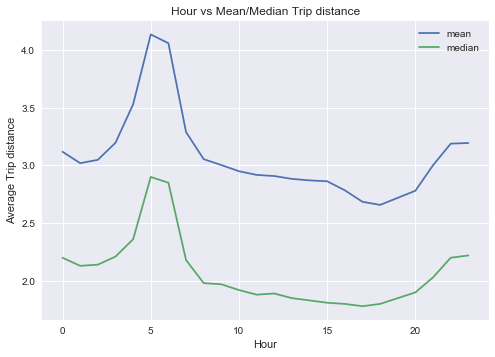

In [25]:
pd.DataFrame(df.groupby(['hour'])[['Trip_distance']].agg(['mean','median'])).reset_index().plot(kind='line',x='hour',y='Trip_distance')
plt.title("Hour vs Mean/Median Trip distance")
plt.xlabel("Hour")
plt.ylabel("Average Trip distance")

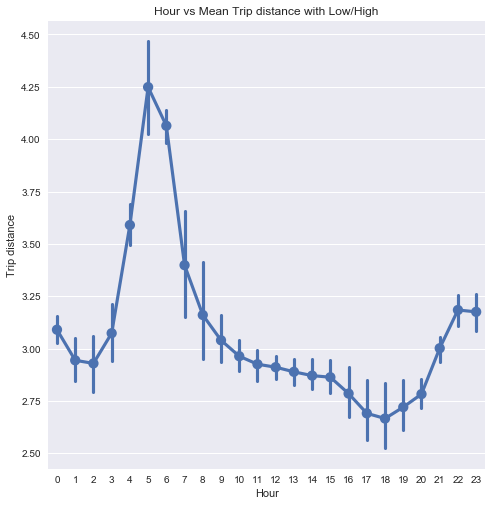

In [26]:
# Below shown is a factorplot, which shows hourly ranges of trip distance.

plt.warnings.filterwarnings('ignore')
sns.factorplot(x="hour", y="Trip_distance", data=dayhour_distance,size=7);
plt.title("Hour vs Mean Trip distance with Low/High")
plt.xlabel("Hour")
plt.ylabel("Trip distance")

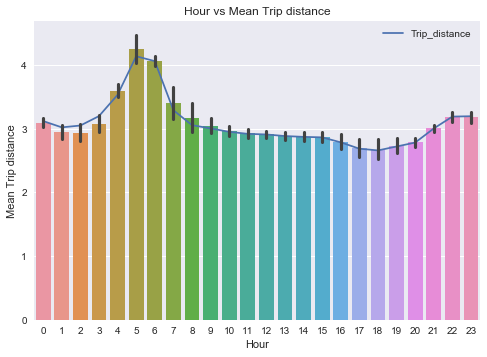

In [27]:
# Below barplot overlays line plot hourly average on the dayofweek hourly average .

plt.figure(figsize=(15,7))
plt.warnings.filterwarnings('ignore')
pd.DataFrame(df.groupby(['hour']).Trip_distance.mean()).reset_index().plot(kind='line',x='hour',y='Trip_distance')
sns.barplot(x='hour',y='Trip_distance',data=dayhour_distance)
plt.title("Hour vs Mean Trip distance")
plt.xlabel("Hour")
plt.ylabel("Mean Trip distance")

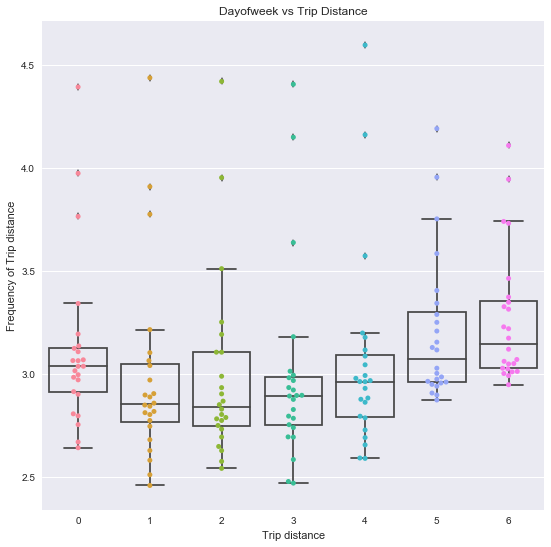

In [28]:
# Below swarm/boxplot clearly shows the ranges per dayofweek and the trip distance.
plt.figure(figsize=(9,9))
plt.warnings.filterwarnings('ignore')
sns.swarmplot(x='dayofweek',y='Trip_distance',data=dayhour_distance)
sns.boxplot(x='dayofweek',y='Trip_distance',data=dayhour_distance,boxprops={'facecolor':'None'})
plt.title("Dayofweek vs Trip Distance")
plt.xlabel("Trip distance")
plt.ylabel("Frequency of Trip distance")

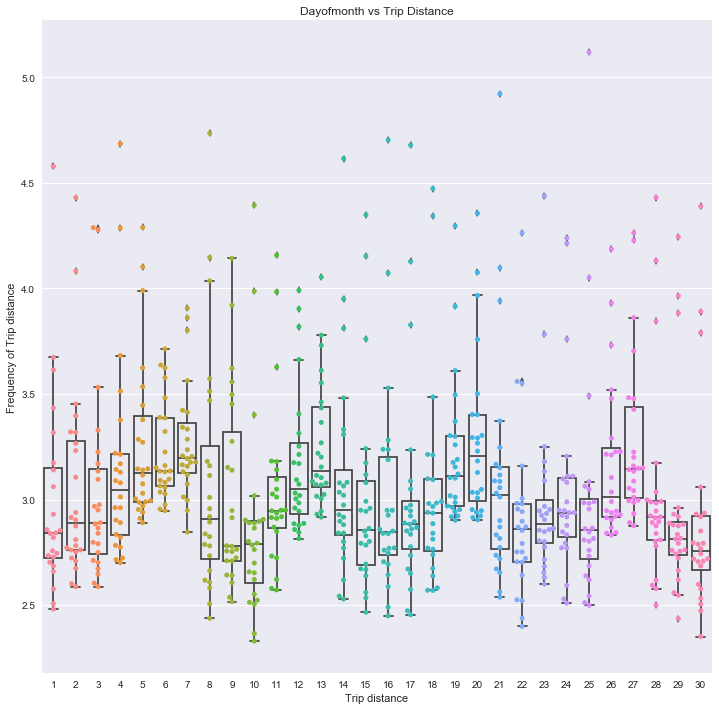

In [29]:
# Below swarm/boxplot clearly shows the ranges per day of month and the trip distance.

moth_dayhour_distance = pd.DataFrame(df.groupby(['day','hour']).Trip_distance.mean()).reset_index()

plt.figure(figsize=(12,12))
plt.warnings.filterwarnings('ignore')
sns.swarmplot(x='day',y='Trip_distance',data=moth_dayhour_distance)
sns.boxplot(x='day',y='Trip_distance',data=moth_dayhour_distance,boxprops={'facecolor':'None'})
plt.title("Dayofmonth vs Trip Distance")
plt.xlabel("Trip distance")
plt.ylabel("Frequency of Trip distance")

### Summary of Question 3.1:

1. Some outliers/wrong data has been removed.
2. Created dayofweek vs trip distance boxplot/swarm chart
3. Created dayofmonth boxplot/swarm chart.
4. Mean/Median of the trip distance were grouped by hour of day.

## NYC Airport taxi analysis

In this section, we will try to find out the airports and the green taxi activity around this area. By analyzing it, we can try to find any interesting characters on these trips.

Below are the differnt NYC Airport Coordinates which I got from google.

1. JFK: 40.6413° N, 73.7781° W 
2. LaGuardia: 40.7769° N, 73.8740° W
3. Newark Liberty: 40.6895° N, 74.1745° W

We also need to assign what is mean by near to the airport. A person might walk for some distance from airport to avail a taxi. So we will assign a value in miles around the airport and consider as the spots nearby airport.

Before performing these analysis, we need to correct and filter out the Total amount. Because some of them are missing and has negative values. 

In [30]:
#Below are the records which has total amount of 0 and negative amount. It is still not clear with the dataset about negative values. 
#For now, we will not consider these values while calculating mean fare.

df[df.Total_amount <=0][['Trip_distance','Store_and_fwd_flag','Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge',
       'Total_amount']].head()

,Trip_distance,Store_and_fwd_flag,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount
173,2.47,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,1.45,N,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
232,0.01,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,0.63,N,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8
568,0.06,N,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3


In [31]:
# We will consider that any one mile near to the airport is considered as airport dropoff
nearest_area = 1

In [32]:
airport_locations = {'jfk':(40.6413,-73.7781), 'newark':(40.6895,-74.1745),
                   'lag': (40.7769,-73.8740)}

In [33]:
airport_analysis = df[['Pickup_latitude','Pickup_longitude','Dropoff_latitude','Dropoff_longitude']]

In [34]:
def pickup_distance(x, air_dict):
    """Function which calculates the distance from pickup location to all the other locations in the dataset."""
    result =[]
    
    p = 0.017453292519943295
    d = 12742
    m = 0.621371     
    
    for key,val in air_dict.items():
        
        pickup = d * asin(sqrt(0.5 - cos((x.Pickup_latitude-val[0])*p)/2 + cos(val[0]*p)*cos(x.Pickup_latitude * p) * (1-cos((x.Pickup_longitude-val[1])*p)) / 2)) * m
        dropoff = d * asin(sqrt(0.5 - cos((x.Dropoff_latitude-val[0])*p)/2 + cos(val[0]*p)*cos(x.Dropoff_latitude*p) * (1-cos((x.Dropoff_longitude-val[1])*p)) / 2)) * m

        result.append((pickup,dropoff))
    return result

# Airport distance calculation
airport_analysis['distance'] = airport_analysis.apply(pickup_distance,air_dict =airport_locations,axis=1)


In [35]:
df['jfk_pickup_distance'] = airport_analysis['distance'].apply(lambda x: x[0][0])
df['jfk_dropoff_distance'] = airport_analysis['distance'].apply(lambda x: x[0][1])

df['newark_pickup_distance'] = airport_analysis['distance'].apply(lambda x: x[1][0])
df['newark_dropoff_distance'] = airport_analysis['distance'].apply(lambda x: x[1][1])

df['lag_pickup_distance'] = airport_analysis['distance'].apply(lambda x: x[2][0])
df['lag_dropoff_distance'] = airport_analysis['distance'].apply(lambda x: x[2][1])



In [36]:
del airport_analysis

In [37]:
def airport_analysis(airport):
    
    airport_pickup = airport+'_pickup_distance'
    airport_dropoff = airport+'_dropoff_distance'
    
    airport_df = df[np.logical_or(df[airport_pickup] <nearest_area,df[airport_dropoff] <nearest_area)]
    
    total_count = airport_df.count()[0]
    pickup_count = airport_df[airport_df[airport_pickup] <nearest_area].count()[0]
    dropoff_count = airport_df[airport_df[airport_dropoff] <nearest_area].count()[0]
    
    #Get only the Fare above 0
    fare_mean = round(airport_df[airport_df>0].Total_amount.mean(),2)
    travel_distance_mean = round(airport_df.Trip_distance.mean(),2)
    airport_type = airport
    
    print("\n***Airport "+airport+'***'+'\n')
    print("Total number of pickup/dropoff rides: {}".format(total_count))
    print("Total number of pickup rides: {}".format(pickup_count))
    print("Total number of dropoff rides: {}".format(dropoff_count))
    print("Average fare near airport: {}".format(fare_mean))
    print("Average travel distance near airport: {}".format(travel_distance_mean))
    
    temp_df = pd.DataFrame({'airport_type':airport,'total_count':[total_count],'pickup_count':[pickup_count],'dropoff_count':[dropoff_count],'fare_mean':[fare_mean],'travel_distance_mean':[travel_distance_mean]})    
    return temp_df

In [38]:
analysis_df = airport_analysis('newark')

analysis_df = analysis_df.append(airport_analysis('jfk'),ignore_index=True)
analysis_df = analysis_df.append(airport_analysis('lag'),ignore_index=True)


***Airport newark***

Total number of pickup/dropoff rides: 714
Total number of pickup rides: 42
Total number of dropoff rides: 712
Average fare near airport: 97.71
Average travel distance near airport: 20.33

***Airport jfk***

Total number of pickup/dropoff rides: 12933
Total number of pickup rides: 285
Total number of dropoff rides: 12835
Average fare near airport: 48.84
Average travel distance near airport: 13.8

***Airport lag***

Total number of pickup/dropoff rides: 29119
Total number of pickup rides: 1713
Total number of dropoff rides: 27818
Average fare near airport: 23.46
Average travel distance near airport: 5.53


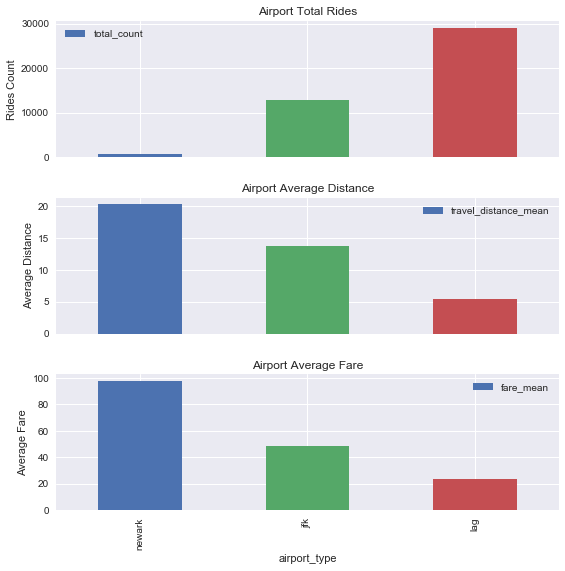

In [39]:
f, (ax1,ax2,ax3) = plt.subplots(3,sharex=True)
analysis_df.plot(kind='bar',x ='airport_type',y='total_count',ax=ax1)
ax1.set_title("Airport Total Rides")
ax1.set_ylabel("Rides Count")

analysis_df.plot(kind='bar',x ='airport_type',y='travel_distance_mean',ax=ax2)
ax2.set_title("Airport Average Distance")
ax2.set_ylabel("Average Distance")

analysis_df.plot(kind='bar',x ='airport_type',y='fare_mean',ax=ax3)
ax3.set_title("Airport Average Fare")
ax3.set_ylabel("Average Fare")

f.subplots_adjust(hspace=0.3)
f.set_size_inches(9,9)


Lets calculate the mean fare in airport pickup/dropoff location and non-airport locations. We will get the data from all NYC airports and calculate the mean of it.  

In [40]:
# Non Airport Mean Fare
non_airport_mean_fare = pd.concat([df[~np.logical_or(df.jfk_pickup_distance <1,df.jfk_dropoff_distance <1)],
          df[~np.logical_or(df.newark_pickup_distance <1,df.newark_dropoff_distance <1)],
          df[~np.logical_or(df.lag_pickup_distance <1,df.lag_dropoff_distance <1)]]).Total_amount.mean()

# Airport Mean Fare
airport_mean_fare = pd.concat([df[np.logical_or(df.jfk_pickup_distance <1,df.jfk_dropoff_distance <1)],
          df[np.logical_or(df.newark_pickup_distance <1,df.newark_dropoff_distance <1)],
          df[np.logical_or(df.lag_pickup_distance <1,df.lag_dropoff_distance <1)]]).Total_amount.mean()

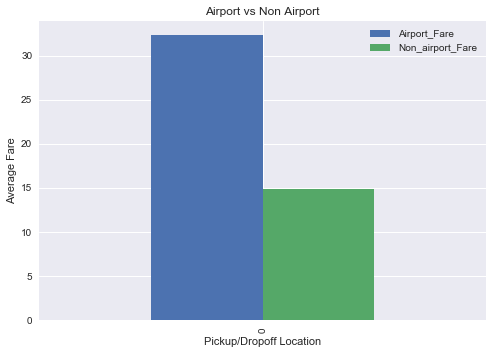

In [41]:
pd.DataFrame({'Non_airport_Fare':[non_airport_mean_fare],'Airport_Fare':[airport_mean_fare]}).plot(kind='bar')
plt.title("Airport vs Non Airport")
plt.xlabel("Pickup/Dropoff Location")
plt.ylabel("Average Fare")

### Summary of Question 3.2:

1. Total average fare amount near the airport is higher than non-airport locations. So if a driver needs to earn more, he needs to be around airports.
2. Newark airport has very less riders. But the average fare and distance is high from that airport. So to earn more between the airports, the taxi driver should be around Newark airport.
3. JFK airport is having average riders, fare and distance compared to other airports.
4. Laguardia has many riders, but the distance and fare is less. So if the driver needs more frequent rides, then this airport should be selected.


In [42]:
del analysis_df

## Build a derived variable and model

Created in separate file Model.ipynb

## Realtime pickup rideshare search

In this section, we will create an algorithm to find the nearest pickup requests from the point which we are requesting. So by showing the realtime pickup requests, we can promote ride sharing and create a business out of it.

As a first step, we will filter the dataframe to the required columns, so we can fit in memory and see the data easily in the notebook.

In [43]:
df_geo = df[['Trip_distance','lpep_pickup_datetime', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'jfk_pickup_distance']]

We are going to use Geohash technique to find out the nearest pickup points. For that we need to convert latitude/longitude to a geohasing point so we can find out the nearest points with less complexity. 

Geohash spilts the locations into hash string from binary values. For every latitude and longitude position, we can create a hash string. Nearest string will have similar values like that string. More can be read in [wikipage](https://en.wikipedia.org/wiki/Geohash).

In [44]:
#Calculating geohash for all the available points which are available in the dataset

if os.path.exists('./generated_files/hash.pkl'):
    df_geo['geo_hash'] = pd.read_pickle('./generated_files/hash.pkl','gzip')
else:
    df_geo['geo_hash'] = df_geo.apply(lambda x: geohash.encode(x.Pickup_latitude,x.Pickup_longitude),axis=1)

In [45]:
def taxi_pickup_time():
    """Function which takes current time and september month with 2015 year.
    It also provides, the timestamp after one hour. It is the threshold waiting 
    time for the ridesharing pickup"""
    
    now = datetime.datetime.now()
    request_time = '2015-09-'+str(now.day)+' '+str(now.hour)+':'+str(now.minute)+':'+str(now.second)
    current_time = datetime.datetime.strptime(request_time, '%Y-%m-%d %H:%M:%S')
    #Threshold time
    threshold_time = current_time+timedelta(hours=1)

    return current_time,threshold_time

In [46]:
def nearest_pickups(lat,log):
    """Main function which calculates the nearest point by geohash technique. 
    1. It calculates the hash ofthe lat/log.
    2. Filters out the requested ride for next hour.
    3. Picks minimum of 5 pickup points nearby.
    4. Calculates the distance from pickup point to other riders using great circle distance.
    5. Filters out the output data and provides nearest 30 riders."""
    
    s = geohash.encode(lat,log)
    nearby_cabs=[]
    #geo_hash_cd =[]
    geo_index =[]
    current_time,threshold_time = taxi_pickup_time()
    current_geo_df = df_geo[np.logical_and(df_geo['lpep_pickup_datetime'] > current_time, df_geo['lpep_pickup_datetime'] < threshold_time)]
    for i in range(len(s),0,-1):
        if len(nearby_cabs) ==0 | len(nearby_cabs) <5:
            for origin in current_geo_df['geo_hash'].iteritems():
                if s[:i] in origin[1]:
                    nearby_cabs.append(geo.great_circle(geohash.decode(s),geohash.decode(origin[1])).miles)
                    #geo_hash_cd.append(geohash.decode(s))
                    geo_index.append(origin[0])
    if df_geo.ix[geo_index].count()[0] > 30:
        return df_geo.ix[geo_index].sort_values(['geo_hash']).head(30)
    else:
        return df_geo.ix[geo_index]

In [47]:
def add_points(x):
    """Adds the points to Folium map and returns the pooint details."""
    folium.Marker([x['Pickup_latitude'],x['Pickup_longitude']]).add_to(m1)
    return x

Below chart shows the NYC maps which is using Folium. This is just an exploratory map, to provide the latitude and longitude of the pickup point. In actual usecase, point location is generated using mobile or any location deduction device.

Click on any point near the NYC area to show the lat/long point. This needs to be manually inputed in the next chart.

In [48]:
# This point is NYC. Change if you need a different city and have different dataset
#ELSE DO NOT CHANGE below code.

select_point = (40.7128,-74.0060)
m = folium.Map(location=[select_point[0],select_point[1]])
m.add_child(folium.LatLngPopup())
m

From the above chart you need to manually input the lat/long in the below area. In actual product, this can be inputed automatically to next field.


In [49]:
# CHANGE THE BELOW POINT using above map. This will be the pickup point
s = (40.6473,-73.7883)
m1 = folium.Map(location=[select_point[0],select_point[1]])
# Pickup point marked in RED color

folium.Marker([s[0],s[1]],icon=folium.Icon(color='red'),popup='Pickup Point').add_to(m1)
#Ride sharing rides is marked in Blue color
nearby_rides = nearest_pickups(s[0],s[1]).apply(add_points,axis=1)

print("Current Pickup time: {}".format(taxi_pickup_time()[0]))
print("Pickup rides within next one hour: {}".format(taxi_pickup_time()[1]))

m1

Current Pickup time: 2015-09-28 19:00:32
Pickup rides within next one hour: 2015-09-28 20:00:32


### Summary of Question 5:

Efficiency of regular approch:
1. Total records count is around `1494925`(n) for the dataset September 2015. 
2. If I need to calculate distance between the pickup point and all the points to see which other points are near, we need 1*n calculation. 
3. Then we need to calcuate the distance between the points. Using geocircle or google distance.
4. After that we need sort the data using n^2 computations.
5. Take the top 30 pickup points which are nearby and plot it. It approximatly takes around 10 - 15 mins for the complete calcuations in decent config server.
6. This computations need to be applied for each and every new pickup point. 

Efficiency of the approach which is followed:
1. It calculates the hash of the lat/log for all the points. This will not change in future. So this can be created a pickle file and loaded.
2. It also filters out the requested ride for next hour. So huge amount of data is not loaded.
3. It picks minimum of 5 rideshare points nearby from the pickup points. It is a kind of search string problem, it just searchs for the similar string in the dataset.
4. Calculates the distance from pickup point to other riders using great circle distance.
5. Filters out the output data and provides nearest 30 riders.
6. Geohash technique is so quick, it can provide the results in 60ms for the complete operations including the map.

## Future Ideas

1. In Question5, current realtime search works using pickup and datetime. I would like to extend it to destination too. So passenges who start and end and same location can perform rideshare.
2. In Question4, we have build a model which works perfectly. But the dependent variable is a derived variable. So the results are very good. I need to try to run the model without Total_amount and tips independent variables and test further. And other performance tweaks can be performed.
3. In Question4, I also need to try Neural network model instead of sklearn.
4. For Question3, the distance is calculated to all the points from each airport. So the performance is slow. I would alter the code using GeoHash method to get higher performance.
5. For Question2 & 3, I would have added some more EDA to understand more about the data paterns. That will provide more info during modelling phase.

But in overall, this dataset has a mix of EDA, data cleaning, modelling and analysis. The results obtained were satisfying. Please let me know if you have any issues in running the code or got any queries. Thanks for the opportunity.



## Reference Links

1. https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude
2. https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
3. https://en.wikipedia.org/wiki/Geohash
4. http://python-visualization.github.io/folium/docs-v0.5.0/quickstart.html#Choropleth-maps
5. https://stackoverflow.com/questions/466345/converting-string-into-datetime
6. https://github.com/bvshyam/cuny_data_science_repo/blob/master/622%20-%20Machine%20Learning/homework-2-ml_pipeline/Python/train_model.py
